In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
fish_df=pd.read_csv('Fish.csv')
num_cols=[]
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
num_cols=[
    'Length1',
    'Length2',
    'Length3',
    'Height',
    'Width'
]

num_cols = list(fish_df.select_dtypes(include=[float]).columns)
num_cols.remove("Weight")
print(num_cols)
cat_cols=['Species']

target_cols=['Weight']

['Length1', 'Length2', 'Length3', 'Height', 'Width']


In [3]:
fish_df.isna().mean()

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

In [29]:
x=fish_df.drop('Weight',axis=1)
y=fish_df['Weight']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.7,random_state=130)

In [23]:
import sklearn.linear_model as skl 
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    [('categorical', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Species']),
    ('numerical', 'passthrough', num_cols)])

model = skl.LinearRegression()
pipline = make_pipeline(transformer, model)

оценим метрики обученной модели"

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

def calc_pipe_metrics(pipeline):
    '''Calculates R2 on train and test for given pipeline'''
    pipeline.fit(x_train, y_train)
    tr_predict=pipeline.predict(x_train)
    ts_predict=pipeline.predict(x_test)
    return r2_score(y_train,tr_predict), r2_score(y_test,ts_predict)

def pp_metrics(pipline):
    pipline.fit(x_train, y_train)
    tr_predict=pipline.predict(x_train)
    ts_predict=pipline.predict(x_test)
    print (f'R² train {r2_score(y_train,tr_predict)}, R² test {r2_score(y_test,ts_predict)}')
    print(f'MSE train {mean_squared_error(y_train,tr_predict)}, MSE test {mean_squared_error(y_test,ts_predict)}')


base_line Вот это 

In [24]:
pp_metrics(pipline)

R² train 0.8995277459109481, R² test 0.8824826939309711
MSE train 12322.423999151988, MSE test 15196.595428015451


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

transformer_drop_cat = ColumnTransformer([
    ("drop_cat", 'drop', cat_cols),
    ("take_num", "passthrough", num_cols)
])

pipe_poly2 = make_pipeline(transformer_drop_cat, poly_features, skl.LinearRegression())
pp_metrics(pipe_poly2)

R² train 0.9887387267335356, R² test 0.9555741115247877
MSE train 1381.1393525290723, MSE test 0.9555741115247877


In [9]:
def test_polynomial_evolution(model):
    train_errs = []
    test_errs = []
    degs = [x for x in range(1,5)]
    for deg in degs:
        poly = PolynomialFeatures(degree=deg, include_bias=False, interaction_only=True)
        pipe = make_pipeline(transformer_drop_cat, poly, model)
        train_err, test_err = calc_pipe_metrics(pipe)
        train_errs.append(train_err)
        test_errs.append(test_err)
    return degs, train_errs, test_errs

degs, train_errs, test_errs = test_polynomial_evolution(skl.LinearRegression())

### Plotting evolution of error in dependence of degree

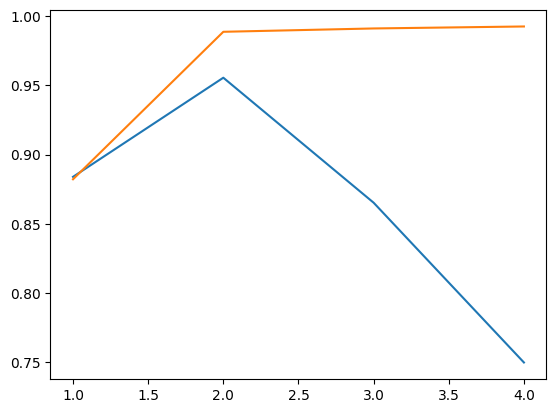

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(data=[[degs[i], test_errs[i]] for i in range(len(degs))])
plt.plot(degs, test_errs)
plt.plot(degs, train_errs)

Degree more than 2 shows rapid descent in quality of predictions
Let's plot an equivalence graph of the best model (train in red, test in blue)
The ideal predictor should follow the line y = x

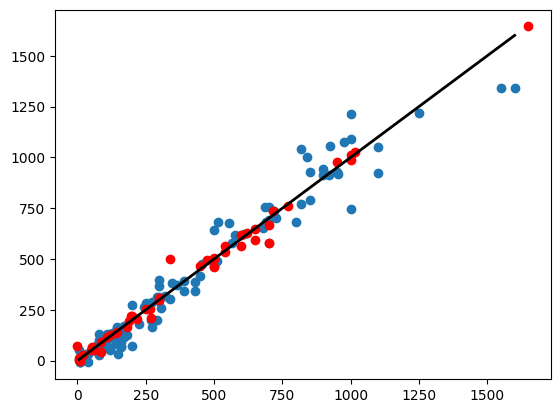

In [11]:
pipe = make_pipeline(transformer_drop_cat,
        PolynomialFeatures(degree=2, include_bias=False, interaction_only=True),
        skl.LinearRegression())
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_pred_test = pipe.predict(x_train)
plt.scatter(y_test, y_pred)
plt.scatter(y_train, y_pred_test, color = 'red')
y_min = np.min(y_test)
y_max = np.max(y_test)
plt.plot([y_min,y_max],[y_min,y_max],color='black', linewidth = 2)
plt.show()

R² train 0.9880819460169729, R² test 0.9672231867769573
MSE train 1461.6902522508976, MSE test 0.9672231867769573


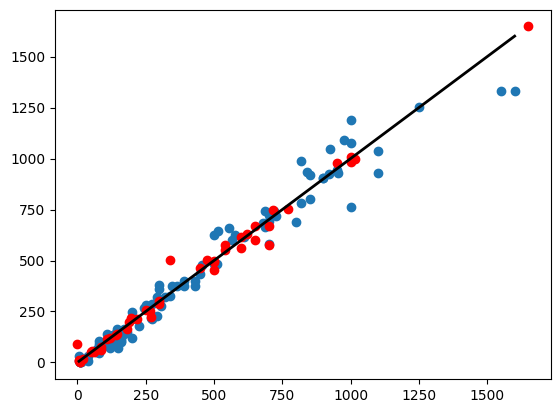

In [12]:
pipe = make_pipeline(transformer_drop_cat,
        PolynomialFeatures(degree=2, include_bias=False, interaction_only=True),
        skl.Ridge())
pp_metrics(pipe)
#pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_pred_test = pipe.predict(x_train)
plt.scatter(y_test, y_pred)
plt.scatter(y_train, y_pred_test, color = 'red')
y_min = np.min(y_test)
y_max = np.max(y_test)
plt.plot([y_min,y_max],[y_min,y_max],color='black', linewidth = 2)
plt.show()


c:\Users\polia\OneDrive\Документы\Govno\Pisson\sklearn-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.895e+04, tolerance: 5.764e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\polia\OneDrive\Документы\Govno\Pisson\sklearn-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.214e+04, tolerance: 5.764e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\polia\OneDrive\Документы\Govno\Pisson\sklearn-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, c

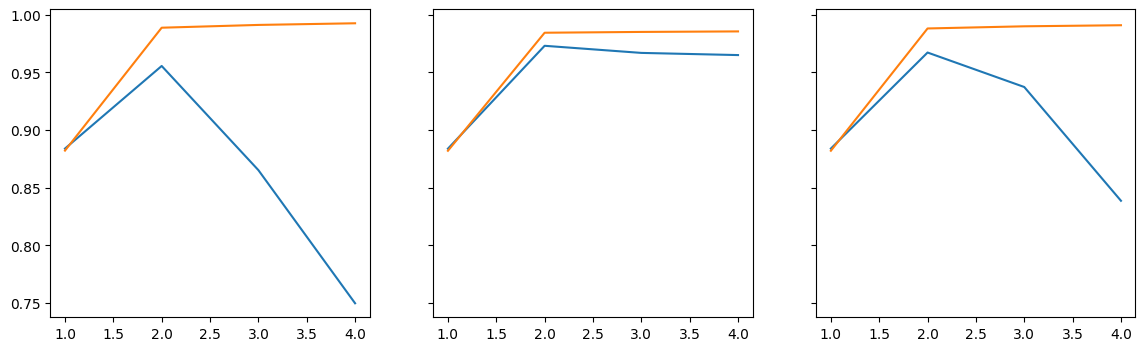

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize=(14, 4))
#without regularisation, L1, L2 reg-s
models = [skl.LinearRegression(), skl.Lasso(), skl.Ridge()]

for i, model in enumerate(models):
    degs, train_errs, test_errs = test_polynomial_evolution(model)
    axs[i].plot(degs, test_errs)
    axs[i].plot(degs, train_errs)
plt.show()

### Adding species feature
Although model seems to do really well, it's obvious that every species tend to have their own "density", which is an extemely important information for making predictions. I haven't included this feature in our session of polynomial experiments, 'cause it seemed to me that in any encoding it will make no sense to multiply it by all the numeric features like length and width...

Let's first verify this hypothese

In [34]:
## metrics of same model without 'species':
## R² train 0.98873, R² test 0.95557

## 'transformer' is a column transformer we used at the beginning, which encodes 'species' ordinally and passes all the num features
pipeline_all_poly = make_pipeline(transformer, PolynomialFeatures(degree=2, interaction_only=True), skl.LinearRegression())
pp_metrics(pipeline_all_poly)

R² train 0.990583275048768, R² test 0.9096142539910069
MSE train 1154.9146436948402, MSE test 11688.113525604584


Model shows high overfitting, we could try to adress it by adding L1 or L2 normalisation, but I will pass directly to using polynomial features only for numeric cols so that encoded 'species' won't be overmultiplied producing sensless features

In [33]:
poly_transformer = ColumnTransformer([
    ('encode_cats', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols),
    ('make_polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), num_cols)
])
pipeline = make_pipeline(poly_transformer, skl.LinearRegression())
pp_metrics(pipeline)

R² train 0.9892711708437111, R² test 0.9492343367526517
MSE train 1315.8377213382505, MSE test 6564.694782500141


But even now, as we see, the result isn't any better than it was without Species column - in fact it model has preformed even worse - R2 score is 0.005 less that it was. Is that 'cause Species aren't a good feature in the dataset ?

In [32]:
from sklearn.feature_selection import mutual_info_regression
encoded, _ = pd.factorize(x_train.Species)
x_train_mi = x_train.copy()
x_train_mi['Species'] = encoded
mi = pd.Series(
    mutual_info_regression(
        x_train_mi,
        y_train))
mi.index = x_train.columns
print(mi)

Species    0.626108
Length1    1.353438
Length2    1.372545
Length3    1.565441
Height     0.899169
Width      1.302534
dtype: float64


So, as we see, the Species feature isn't as much really important as I was convinced. This may have too be as relatively all normal fish species would got nearly the same body density as it must permit them to swim normally in the sea. My intuition is that if we have intoduced some submarine-species living under kilometers of water, that wouldn't be the case - they need to resist enormous pressure and their body must be prepared to these conditions. However, 0.60 mi score, although less than other features, isn't nothing. Lets remember that ordinal encoding isn't doing really good for linear models - as our feature must have one and only one weight, with imposed barely random order, no doubt that our models doing hard to get some use of this information. Let's try OneHotEncoder

In [37]:
from sklearn.preprocessing import OneHotEncoder
one_hot_transformer = ColumnTransformer([
    ('encode_cats', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_cols),
    ('make_polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), num_cols)
])
pipeline = make_pipeline(one_hot_transformer, skl.LinearRegression())
pp_metrics(pipeline)

R² train 0.9903489252739003, R² test 0.9495341564654267
MSE train 1183.656482088011, MSE test 6525.923991807321


Now the model is over fitting - accuracy on test grows while on validation we get worse results. Let's add L2 regularisation, it have preformed really well the last time

In [38]:
pipeline = make_pipeline(one_hot_transformer, skl.Ridge())
pp_metrics(pipeline)

R² train 0.9886051528378491, R² test 0.9664674955234018
MSE train 1397.5215288103836, MSE test 4336.211586739883


In [57]:
## adding scaling, just in case
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
final_transformer = ColumnTransformer([
    ('encode_cats', OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_cols),
    ('scale_and_make_polynomial', 
     Pipeline([
        ("scale", StandardScaler()),
        ("polynomial",PolynomialFeatures(degree=2, include_bias=False, interaction_only=True), num_cols)
    ]), num_cols)
])
pipeline = make_pipeline(one_hot_transformer, skl.Ridge())
pp_metrics(pipeline)

R² train 0.9886051528378491, R² test 0.9664674955234018
MSE train 1397.5215288103836, MSE test 4336.211586739883
